In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days


(-4, 4)

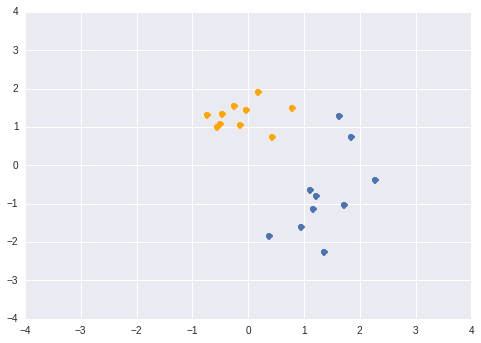

In [2]:
cov = np.identity(2)

#generate blue class:
#    generate m_1, ..., m_10 from N((1,0), I)
mean = [2,-1]
blue_m = np.random.multivariate_normal(mean,cov,10)

#generate orange class:
#    generate m_1, ..., m_10 from N((0,1), I)
mean = [0,1]
orange_m = np.random.multivariate_normal(mean,cov,10)

plt.plot(orange_m[:,0],orange_m[:,1], 'o', color='orange')
plt.plot(blue_m[:,0],blue_m[:,1], 'o', color='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

(-4, 4)

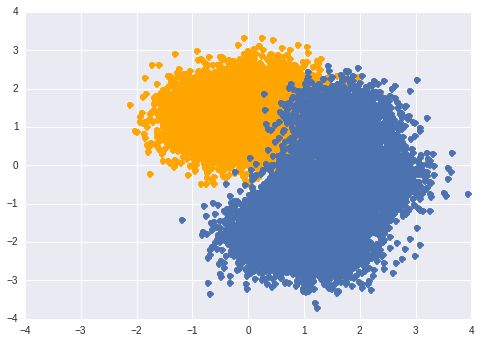

In [3]:
N = 10000

oranges = []
for i in range(N):
    cur_mean = orange_m[np.random.randint(0,10)]
    
    new_point = np.random.multivariate_normal(cur_mean,cov/5,1)
    #print new_point
    oranges.append(new_point[0])
    
oranges = np.array(oranges)
plt.plot(oranges[:,0],oranges[:,1], 'o', color='orange')

blues = []
for i in range(N):
    cur_mean = blue_m[np.random.randint(0,10)]
    
    new_point = np.random.multivariate_normal(cur_mean,cov/5,1)
    #print new_point
    blues.append(new_point[0])
    
blues = np.array(blues)
plt.plot(blues[:,0],blues[:,1], 'o', color='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

In [4]:
x_train = np.append(blues, oranges)
x_train = x_train.reshape((2*N,2))

y_train = np.append(np.zeros(N), np.ones(N)).reshape((2*N,1))

In [5]:
print N
print len(x_train)

10000
20000


In [6]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log", penalty="l2", n_iter=1000)
clf.fit(x_train, np.ravel(y_train))


SGDClassifier(alpha=0.0001, class_weight=None, epsilon=0.1, eta0=0.0,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='log', n_iter=1000, n_jobs=1, penalty='l2', power_t=0.5,
       random_state=None, shuffle=False, verbose=0, warm_start=False)

In [7]:
x_test = 8*np.random.rand(100000, 2)-4

In [8]:
y_test = clf.predict(x_test)

(-4, 4)

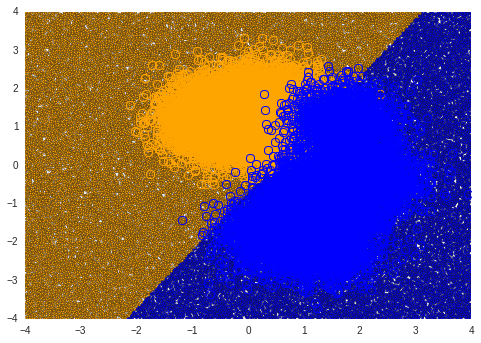

In [9]:
colors = np.array(["blue", "orange"])
#for x,y in zip(x_test, y_test):
    #plt.plot(x[0], x[1], '.', color=colors[int(y)])
sizes = 4*(np.ones(len(x_test)))
plt.scatter(x_test[:,0], x_test[:,1], c=colors[y_test.astype(int)], s=sizes)

plt.plot(oranges[:,0],oranges[:,1], 'o',   markersize=8, markeredgewidth=1, markerfacecolor='none', markeredgecolor='orange')
plt.plot(blues[:,0],blues[:,1], 'o',  markersize=8, markeredgewidth=1, markerfacecolor='none', markeredgecolor='blue')
    
plt.xlim([-4,4])
plt.ylim([-4,4])

In [10]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, np.ravel(y_train))

y_test = clf.predict(x_test)

(-4, 4)

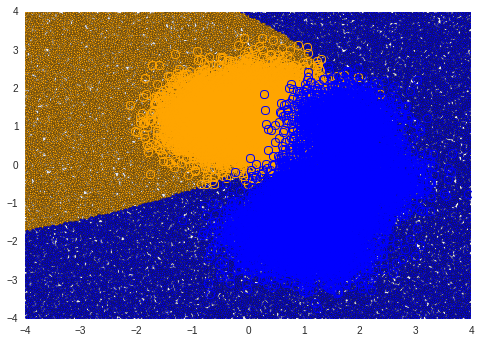

In [11]:
colors = np.array(["blue", "orange"])
#for x,y in zip(x_test, y_test):
    #plt.plot(x[0], x[1], '.', color=colors[int(y)])
sizes = 4*(np.ones(len(x_test)))
plt.scatter(x_test[:,0], x_test[:,1], c=colors[y_test.astype(int)], s=sizes)

plt.plot(oranges[:,0],oranges[:,1], 'o',   markersize=8, markeredgewidth=1, markerfacecolor='none', markeredgecolor='orange')
plt.plot(blues[:,0],blues[:,1], 'o',  markersize=8, markeredgewidth=1, markerfacecolor='none', markeredgecolor='blue')
    
plt.xlim([-4,4])
plt.ylim([-4,4])